# DATASET Kikstarter 
David Leroy

MD4 P2020

Jeudi 6 décembre 2018


# 1) Import

## 1.1 ) Import des librairies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1.2 ) Import du fichier CSV

In [87]:
#index_col=0 car on ne veut pas la premiere colonne avec les index
Tableau = pd.read_csv('dataset.csv', index_col=0)

# 2) Découverte du tableau

## 2.1 ) Affichage des 5 premières valeurs

In [ ]:
Tableau.head()

## 2.2 ) Affichage des 5 dernières vameurs

In [ ]:
Tableau.tail()

## 2.3 ) Affichage du nombre de colonne, du type de chacune & de leurs noms

In [ ]:
Tableau.info()

On remaque qu'il y a 378 661 ligne, 14 colonnes et 3 type d'objet

In [ ]:
print(Tableau.nunique())

On affiche le nombre valeurs uniques pour chaque colonne cela permetra de choisir le graphique adapté aux données

In [5]:
print(Tableau.columns.values)

['name' 'category' 'main_category' 'currency' 'deadline' 'goal' 'launched'
 'pledged' 'state' 'backers' 'country' 'usd pledged' 'usd_pledged_real'
 'usd_goal_real']


## 2.4 ) Recherche & Remplacement des données manquantes ou dupliqué

In [6]:
duplicated_values = Tableau.duplicated().sum()
print(f'Le dataset comporte {duplicated_values} valeurs dupliquées.')

Le dataset comporte 0 valeurs dupliquées.


In [ ]:
#Recherche NAN
Tableau.isna().any()

In [ ]:
#on affiche les pourcentages manquants pour chaque catégorie pour voir ce qu'il faut faire
#avec les variable en fonction des valeurs manquantes

Pourcentage_Manquant = (Tableau.isnull().sum() * 100 / len(Tableau)).round(2)
missing_value_df = pd.DataFrame({'Pourcentage_Manquant': Pourcentage_Manquant})
missing_value_df.sort_values('Pourcentage_Manquant', ascending=False, inplace=True)
missing_value_df

Pour la colonne usd pledged il manque 1% des données, voyons ce que nous pouvons faire

In [49]:
#Pouvons nous remplacer les valeurs de usd pleged par usd_pleged_real ?
duplication = Tableau.duplicated(['usd pledged', 'usd_pledged_real'])

#On compte les valeurs identiques
dup_count = 0
for row in duplication:
    if row == True:
        dup_count += 1     
        
# Affichage du pourcentage
print('Valeurs identiques entre USD Pledged & USD Pledged Real: {} %'.format(round(dup_count / len(Tableau) * 100, 2)))
print("ce pourcentage est élevé mais je ne pense pas qu'il soit nécessaire de le remplacer pour le moment")

Valeurs identiques entre USD Pledged & USD Pledged Real: 61.24 %
ce pourcentage est élevé mais je ne pense pas qu'il soit nécessaire de le remplacer pour le moment


## 2.5 ) Les outliers

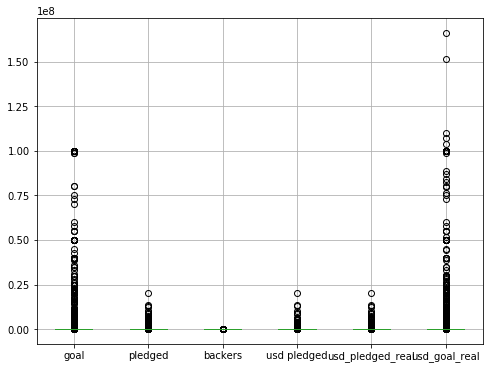

In [25]:
Tableau.boxplot(figsize=(8,6))

# 3) Analyse Univariée

# 3.1 ) Statistiques sur l'état du projet

Pourcentage de succès %: 
failed        52.22
successful    35.38
canceled      10.24
undefined      0.94
live           0.74
suspended      0.49
Name: state, dtype: float64


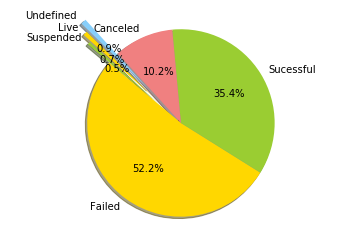

In [50]:
pourcentage_suces = round(Tableau["state"].value_counts() / len(Tableau["state"]) * 100,2)

print("Pourcentage de succès %: ")
print(pourcentage_suces)
# Data to plot

labels = 'Failed', 'Sucessful', 'Canceled', 'Undefined','Live','Suspended'
sizes = [5222, 3538, 1024, 94,74,49]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0, 0.5,0.4,0.3) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

On remarque que seulement 35% des projets réussissent sur KickStarter, et plus 50 échouent

# 3.2 ) Statistiques sur les catégories populaires

Categories dans category:  159


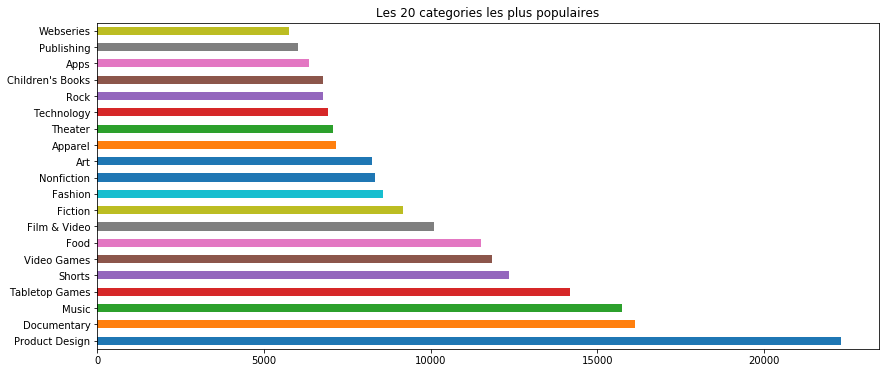

In [78]:
print('Categories dans category: ', Tableau['category'].nunique())
Tableau['category'].value_counts()[:20].plot(kind='barh', 
                                        figsize=(14,6), 
                                        title='Les 20 categories les plus populaires')

Categories dans main_category:  15


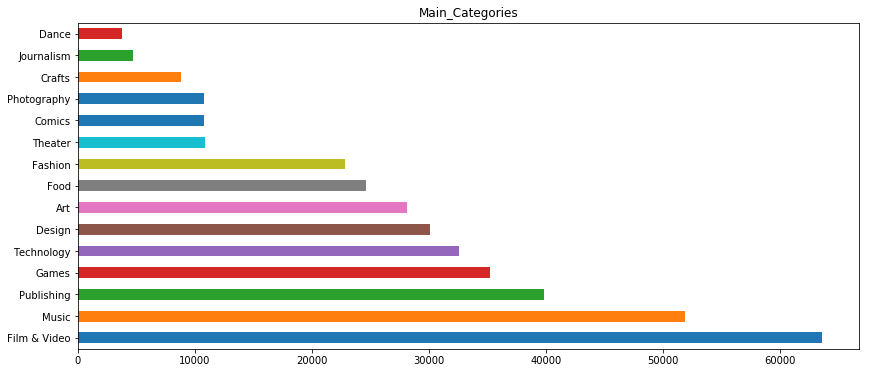

In [122]:
print('Categories dans main_category: ', Tableau['main_category'].nunique())
Tableau['main_category'].value_counts().plot(kind='barh', 
                                        figsize=(14,6),
                                        title='Main_Categories')

## 3.3 ) Répartition en fonction des pays

Number of unique countries:  23


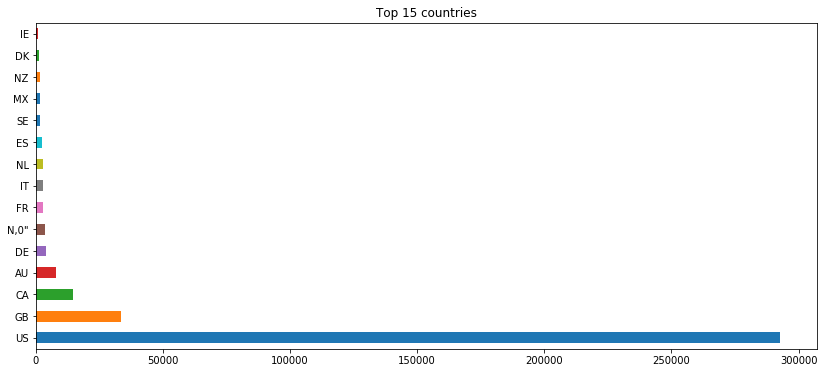

In [82]:
print('Number of unique countries: ', Tableau['country'].nunique())
Tableau['country'].value_counts()[:15].plot(kind='barh', 
                                       figsize=(14,6), 
                                       title='Top 15 countries')

On observe que dans plus de 75% des cas Kikstarter est utilisé aux US, et dans plus de 84% dans des pays anglophones

## 3.3 ) Répartition en fonction des devises

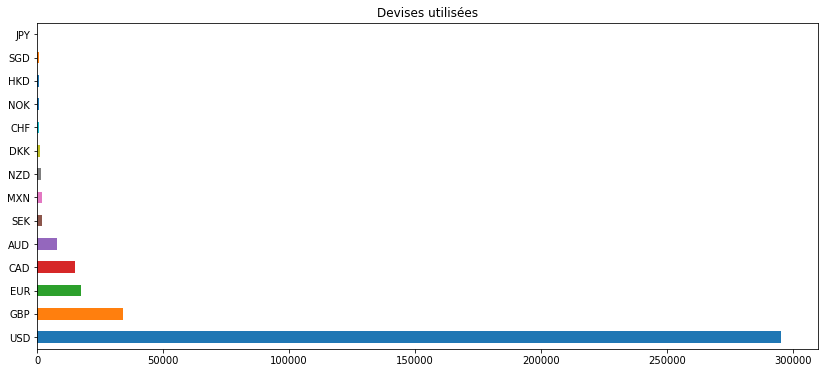

In [82]:
Tableau['currency'].value_counts().plot(kind='barh', 
                                   figsize=(14,6), 
                                   title='Devises utilisées')

Le dollard est majoritairement utilisé

## 3.4 ) conclusion de l'analyse univariée

In [85]:
print('Sur kikstarter en moyenne, il y a {} USD pledged, {} backers et les campagnes ont pour but de recolter en moyenne {} USD.'.format(round(Tableau['usd_pledged_real'].mean(), 2),
                                                                                               int(Tableau['backers'].mean()),
                                                                                               round(Tableau['goal'].mean(), 2)))
print('Dans notre dataset, il y 378661 campagnes, seulement 34,93% soit 132255 réussissent. ')
print("246406 campagnes soit 65,07%, n'ont pas atteint l'objectif ou bien sont annulées")
# Calcul du montant pledged par backer
Tableau['avg_pledged'] = Tableau['usd_pledged_real'] / Tableau['backers']

# Beaucoup de campagnes ont 0 backer
Tableau['avg_pledged'].fillna(0, inplace=True)
Tableau.replace(to_replace=[np.inf, -np.inf], value=0, inplace=True)

print('Le montant moyen par backer est de {} USD'.format(round(Tableau['avg_pledged'].mean(), 2)))

Sur kikstarter en moyenne, il y a 9058.92 USD pledged, 105 backers et les campagnes ont pour but de recolter en moyenne 49080.79 USD.
Dans notre dataset, il y 378661 campagnes, seulement 34,93% soit 132255 réussissent. 
246406 campagnes soit 65,07%, n'ont pas atteint l'objectif ou bien sont annulées
Le montant moyen par backer est de 64.58 USD


# 4 ) Analyse Bi-variée

## 4.1 ) Coefficient de corrélation

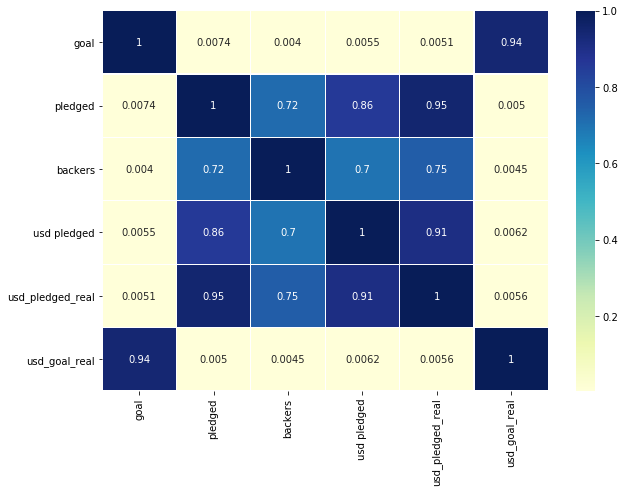

In [91]:
plt.figure(figsize=(10,7))
sns.heatmap(Tableau.corr(), annot=True, linewidths=0.2, cmap="YlGnBu")

### 4.2.1 ) Exploration de la reussite en fonction de la main_catégorie & de la catégorie

In [ ]:
plt.figure(figsize=(20,15))
sns.countplot(x="main_category", hue='state', data=Tableau,)

Pour que cela soit plus claire on va se mettre dans un choix binaire, nous alons donc créer une nouvelle colonne,
qui prendra un true ou false (annulé, échoué, indéfini, suspendu et live car cela represente une minorité) en fonction du sucess

In [ ]:
#Création d'une variable avec une condition
Tableau['sucess'] = ['sucess' if i == 'successful' else 'echec ou live' for i in Tableau['state']]
plt.figure(figsize=(17,5))

#Graph qui n'est pas intéressant car on s'interesse aux pourcentages
sns.countplot(x="main_category", hue='sucess', data=Tableau)

In [ ]:
#Tableau des pourcentages
pourcentage_suces = round(Tableau.groupby(['main_category'])["sucess"].value_counts() / len(Tableau["main_category"]) * 100,2)
print("Pourcentage de succès %: ")
print(pourcentage_suces)

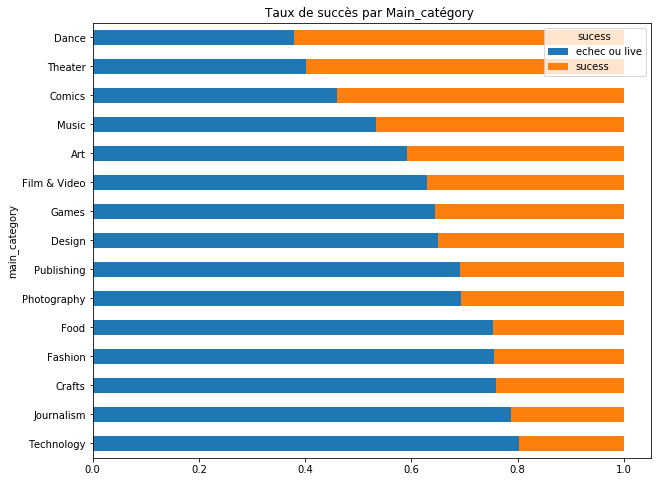

In [100]:
category_ = Tableau.groupby('main_category')
category_ = category_['sucess'].value_counts(normalize=True).unstack()
category_ = category_.sort_values(by=['sucess'],ascending=True)
category_.plot(kind='barh', stacked=True,figsize=(10,8), title='Taux de succès par Main_catégory ')

On remarque qu'il y a 4 main_catégory qui ont plus de 50% de chance de réussir Dance, Theater, Comics, Music

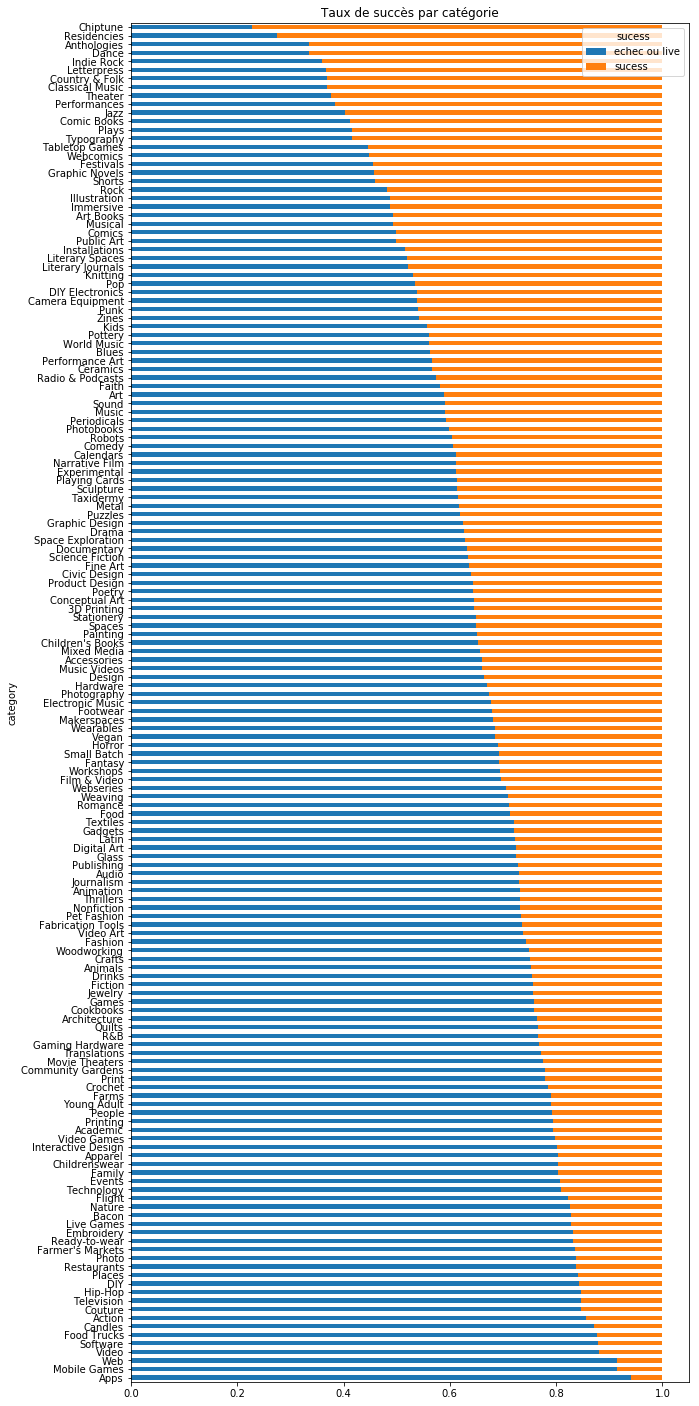

In [103]:
category_ = Tableau.groupby('category')
category_ = category_['sucess'].value_counts(normalize=True).unstack()
category_ = category_.sort_values(by=['sucess'],ascending=True)
category_.plot(kind='barh', stacked=True,figsize=(10,25), title='Taux de succès par catégorie')

### 4.2.2 ) Exploration du % récolté en fonction de la Réussite

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


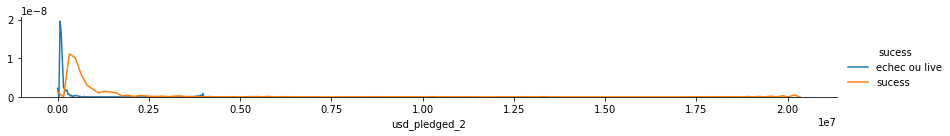

In [109]:
"""
Pour pouvoir obtenir un graph, maintenant que l'on sait que usd pledged et usd pledged real 
ont 61% de valeurs communes, et un coefficient de corélation de 0,91, 
je prend l'initiative de remplacer usd pledged par usd pledged real.
"""

Tableau['usd_pledged_2']=Tableau['usd pledged']
Tableau.usd_pledged_2.fillna(Tableau['usd_pledged_real'], inplace=True) 
#sns.distplot(Tableau['usd_pledged_2'])

#Tableau['usd_pledged_2']=Tableau['usd_pledged_2']/Tableau['usd_goal_real']

g = sns.FacetGrid(Tableau, hue='sucess', height=2, aspect=6)
g.map(sns.kdeplot,'usd_pledged_2')
g.add_legend()

On remarque qu'une grande partie des projets qui ont échoués, n'ont pas réussi a récolter d'argent,
en approfondissant on remarque que la plupart des projets qui ont échoués n'ont pas réussi a recolter 1% de ce qu'ils voulaient. 

On peut se demander si cela est du au temps de la campagne ?

### 4.2.3 )Temps de la campagne

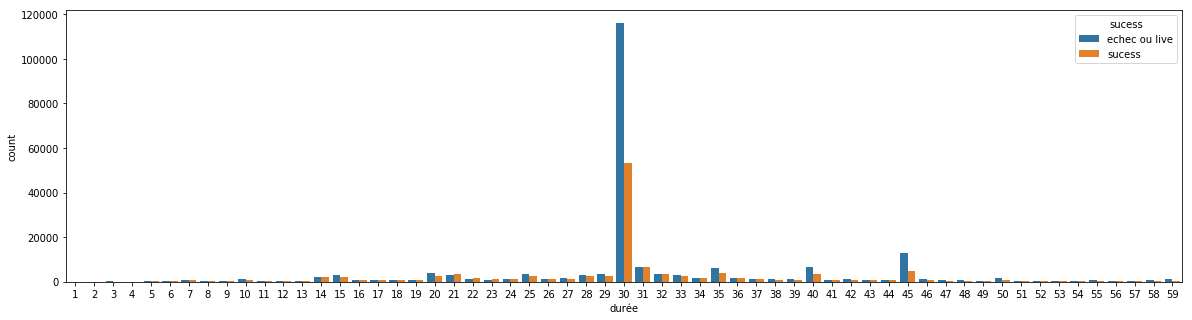

In [117]:
# Calcul de la durée des campagnes
Tableau['durée'] = (pd.to_datetime(Tableau['deadline']) - pd.to_datetime(Tableau['launched'])).dt.days + 1
plt.figure(figsize=(20,5))

sns.countplot(x="durée", hue='sucess', data=Tableau[Tableau['durée']<60])

In [ ]:
category_ = Tableau.groupby('durée')
category_ = category_['sucess'].value_counts(normalize=True).unstack()
category_ = category_.sort_values(by=['durée'],ascending=True)
category_.plot(kind='barh', stacked=True,figsize=(10,8))
print('Taux de succès par durée \n')

Entre 10 et 60 jours on observe le meilleur taux de réussite

### 4.2.4) L'impact du pays

In [ ]:
pourcentage_suces2 = round(Tableau.groupby(['country'])["sucess"].value_counts() / len(Tableau["country"]) * 100,2)

print("Pourcentage de succès %: ")
print(pourcentage_suces)

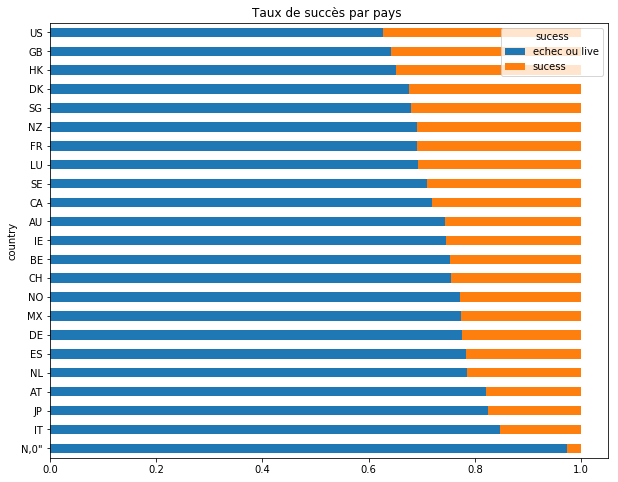

In [121]:
category_ = Tableau.groupby('country')
category_ = category_['sucess'].value_counts(normalize=True).unstack()
category_ = category_.sort_values(by=['sucess'],ascending=True)
category_.plot(kind='barh', stacked=True,figsize=(10,8), title='Taux de succès par pays ')

Le taux de succès varie en fonction des pays de 18 a 45 %, les 3 meilleurs sont HK, US, GB et les 3 pires 
NL,AT et IT

### 4.2.5) L'impact de la devise

In [ ]:
pourcentage_suces = round(Tableau.groupby(['currency'])["sucess"].value_counts() / len(Tableau["currency"]) * 100,2)

print("Pourcentage de succès %: ")
print(pourcentage_suces)

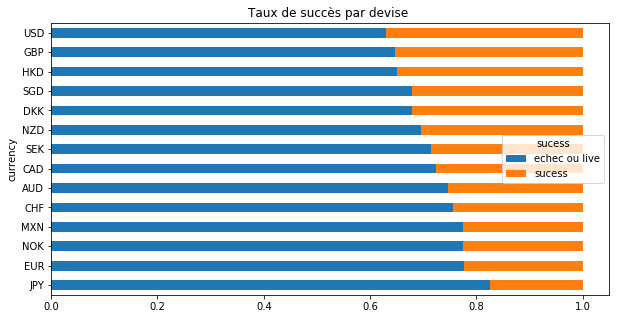

In [124]:
category_ = Tableau.groupby('currency')
category_ = category_['sucess'].value_counts(normalize=True).unstack()
category_ = category_.sort_values(by=['sucess'],ascending=True)
category_.plot(kind='barh', stacked=True,figsize=(10,5),title='Taux de succès par devise ')

L'USD, HKD et GBP sont les devises avec lesquelles les projets ont les plus hauts taux de réussite

### 4.2.6) Analyse de la reussite en fonction du goal

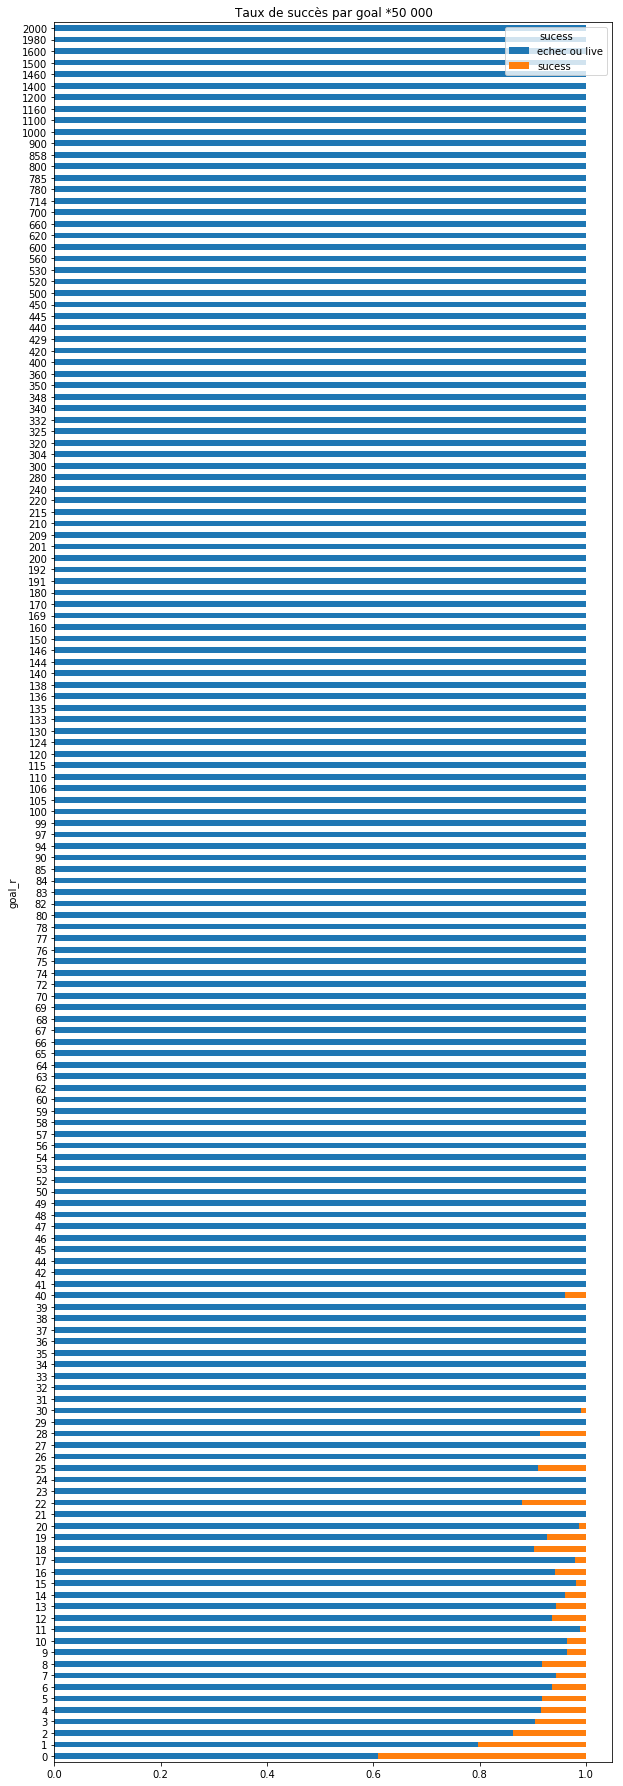

In [126]:
df_data_goal = Tableau.copy()
#Mon noyau plante je suis obligé d'utilisé lamba /30 000 pour regrouper les données par 30 000
#C'est aussi par soucis de representation
df_data_goal['goal_r'] = df_data_goal['goal'].apply(lambda x: round(x/50000))
category_ = df_data_goal.groupby('goal_r')
category_ = category_['sucess'].value_counts(normalize=True).unstack()
category_ = category_.sort_values(by=['goal_r'],ascending=True)
category_.plot(kind='barh', stacked=True,figsize=(10,32), title='Taux de succès par goal *50 000')

On remarque qu'au dessus de 2 000 000 dollars de goal aucun projet n'a aboutit, plus le montant est faible plus le taux de réussite est haut.

#### 4.2.6.1) Analyse aprofondie du goal en fonction de la réussite

La variable sucess enlève de la precision, je pense qu'il est interessant dans ce cas là de ne pas l'utiliser pour mieux comprendre le phénomène

In [ ]:
df_data_goal = Tableau.copy()
#Mon noyau plante je suis obligé d'utilisé lamba /30 000 pour regrouper les données par 30 000
#C'est aussi par soucis de representation
df_data_goal['goal_r'] = df_data_goal['goal'].apply(lambda x: round(x/50000))
category_ = df_data_goal.groupby('goal_r')
category_ = category_['state'].value_counts(normalize=True).unstack()
category_ = category_.sort_values(by=['goal_r'],ascending=True)
category_.plot(kind='barh', stacked=True,figsize=(10,42),title='Taux de state par goal *50 000')

##### On constate qu'il y a peu de projet sont en live au dessus de 2,5 M de dollars, on peut donc considèré que la conclusion du 4.2.6 est bonne

### 4.2.7) Taux de réussite en fonction du nombre de backers

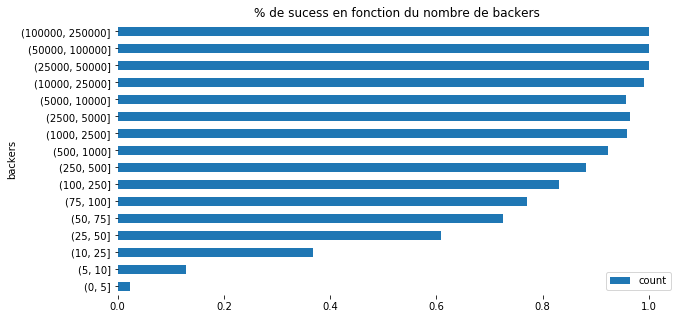

In [51]:
arr = [0,5, 10, 25, 50, 75, 100, 250, 500, 1000, 2500, 5000, 10000, 25000, 50000, 100000, 250000]
bins = pd.cut(Tableau['backers'], arr )
success_bins = pd.cut(Tableau[(Tableau['sucess'] == 'sucess')]['backers'], arr)
ax = (Tableau[(Tableau['sucess'] == 'sucess')].groupby(success_bins)['backers'].agg(['count']) / Tableau.groupby(bins)['backers'].agg(['count'])).plot(kind='barh', title='% de sucess en fonction du nombre de backers', figsize=(10,5))
sns.despine(bottom=True, left=True)

On observe que plus le nombre de backers est élevé plus le taux de réussite est haut, il atteint meme 100% pour les campagnes de plus de 25 000 personnes. Ce qui ne semble pas chocant

### 4.2.8 ) Nom et reussite sont ils liés ?

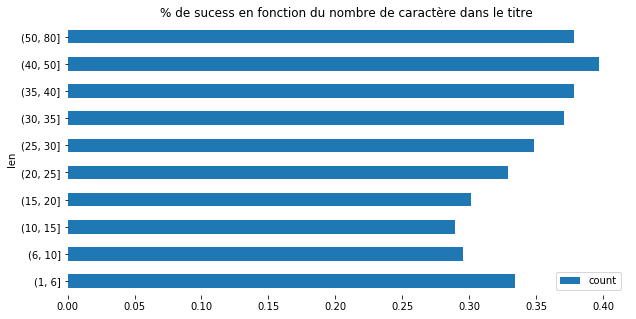

In [129]:
Tableau['len']=Tableau['name'].str.len()
arr = [1,6,10, 15, 20, 25, 30, 35, 40, 50,80]
bins = pd.cut(Tableau['len'], arr )
success_bins = pd.cut(Tableau[(Tableau['sucess'] == 'sucess')]['len'], arr)
ax = (Tableau[(Tableau['sucess'] == 'sucess')].groupby(success_bins)['len'].agg(['count']) / Tableau.groupby(bins)['backers'].agg(['count'])).plot(kind='barh', title='% de sucess en fonction du nombre de caractère dans le titre', figsize=(10,5))
sns.despine(bottom=True, left=True)

On remarque qu'il vaut mieux mettre en titre une phrase de longueur moyenne 25/80 mots ou alors un seul mot

### 4.2.9 ) Analyse du succès en fonction de la date, jour, mois, année.

In [131]:
Tableau['launched']=pd.to_datetime(Tableau['launched'])
Tableau['deadline']=pd.to_datetime(Tableau['deadline'])
Tableau['duration']=Tableau[['launched','deadline']].apply(lambda x:(x[1]-x[0]).days,axis=1)


Tableau['year']=Tableau['launched'].apply(lambda x:x.year)
Tableau['month']=Tableau['launched'].apply(lambda x:x.month)
Tableau['date']=Tableau['launched'].apply(lambda x:x.day)
Tableau['weekday']=Tableau['launched'].apply(lambda x:x.weekday())

In [ ]:
category_ = Tableau.groupby('year')
category_ = category_['sucess'].value_counts(normalize=True).unstack()
category_ = category_.sort_values(by=['sucess'],ascending=True)
category_.plot(kind='barh', stacked=True,figsize=(10,12))
print('Taux de succès par année')

On ne peut rien en conclure car 2018 n'est pas terminé, mais 2011 etait la meilleur année

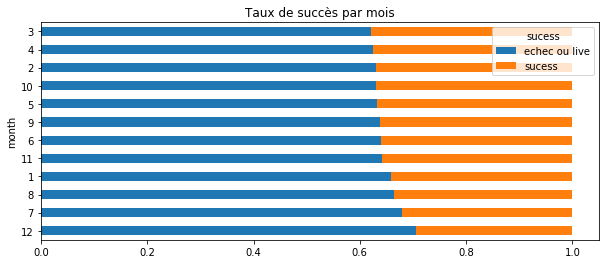

In [133]:
category_ = Tableau.groupby('month')
category_ = category_['sucess'].value_counts(normalize=True).unstack()
category_ = category_.sort_values(by=['sucess'],ascending=True)
category_.plot(kind='barh', stacked=True,figsize=(10,4), title='Taux de succès par mois')


On peut en deduire que le mois de mars est le meilleur mois pour lancer son projet

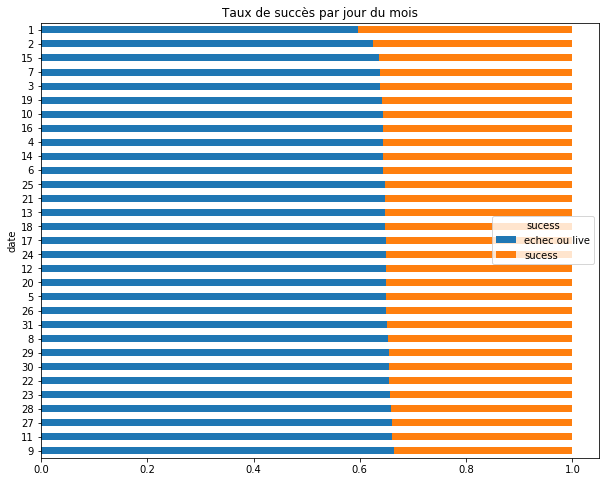

In [135]:
category_ = Tableau.groupby('date')
category_ = category_['sucess'].value_counts(normalize=True).unstack()
category_ = category_.sort_values(by=['sucess'],ascending=True)
category_.plot(kind='barh', stacked=True,figsize=(10,8),title='Taux de succès par jour du mois')

Le premier jour du mois est le meilleur jour pour lancer son projet

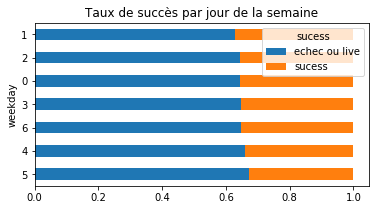

In [137]:
category_ = Tableau.groupby('weekday')
category_ = category_['sucess'].value_counts(normalize=True).unstack()
category_ = category_.sort_values(by=['sucess'],ascending=True)
category_.plot(kind='barh', stacked=True,figsize=(6,3), title='Taux de succès par jour de la semaine')

Le lundi est le meilleur jour de la semaine pour lancer son projet, on peut conclure de cette partie que pour augmeneter ses chances de réussite, il faudait attendre le lundi 1er mars 2021, qui est le prochain lundi 1 en mars

### 4.2.10) Objectif atteint = réussite ?

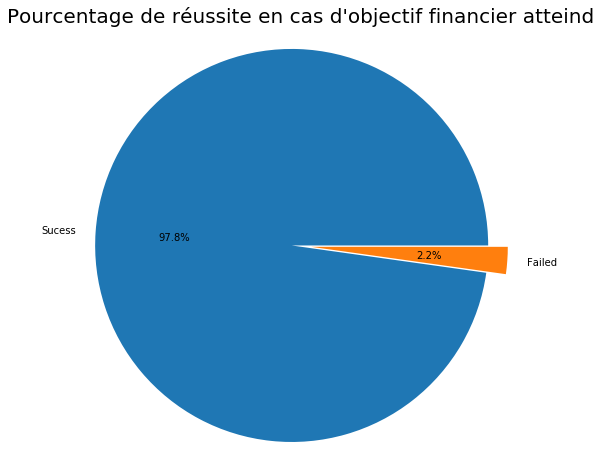

In [172]:
# Graphique montrant le pourcentage de réussite en cas d'objectif financier atteind

success = Tableau[(Tableau['usd_goal_real'] < Tableau['usd_pledged_real']) & (Tableau['sucess2'] == True)]['sucess'].count()
failed = Tableau[(Tableau['usd_goal_real'] < Tableau['usd_pledged_real']) & (Tableau['sucess2'] == False)]['sucess'].count()

plt.figure(figsize=(8,8))

labels = 'Sucess', 'Failed'
sizes = [success, failed]
explode = (0, 0.1)  # explode 1st slice
 
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')
 
plt.axis('equal')
plt.title('Pourcentage de réussite en cas d\'objectif financier atteind', fontsize=20)
plt.show()

On remarque un pourcentage de réussite très haut (+97%), quand le projet a reussi a recolter le montant voulu

# 5 ) Conclusion

Ma representation des facteurs qui influent sur la reussite d'un projet kikstarter


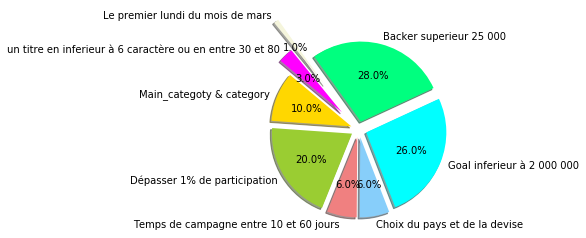

In [167]:
labels = 'Main_categoty & category', 'Dépasser 1% de participation', 'Temps de campagne entre 10 et 60 jours', 'Choix du pays et de la devise','Goal inferieur à 2 000 000','Backer superieur 25 000','Le premier lundi du mois de mars','un titre en inferieur à 6 caractère ou en entre 30 et 80'
sizes = [10, 20, 6, 6,26,28,1,3]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','aqua','springgreen','beige','fuchsia']
explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1,0.7,0.3) 
print("Ma representation des facteurs qui influent sur la reussite d'un projet kikstarter")
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()
 

On peut en conclure que la Main_category joue un role dans le taux de réussite, la categorie encore plus. 

Il existe une etape crucial qui est d'arriver à faire depasser les 1% de participation.

Le temps de campagne n'a pas d'infuluence sauf si on choisi de prendre des outliers surtout faible, c'est pour cela que je preconiserai en 10 & 60 jours pour obtenir un bon taux de reussite.

Les 3 pays où il est favorable de faire sa campagne sont les US,HK & la GB.

Au dessus de 2 000 000 de dollars aucun projet n'a réussi a se finaliser, plus la somme est basse plus le taux de réussite est élevé. 

Le nombre de backers est important aussi car au dessus de 25 000 backers tous les projets ont aboutit positivement.

Le jour de lancement du projet peut aussi influencer, tout comme le titre du projet.
